# 3. Object segmenter which excludes small labels

In [2]:
import apoc
import os
from skimage.io import imread, imsave
import pyclesperanto_prototype as cle
import matplotlib.pyplot as plt
import numpy 

## 9.2.2 Data selection

In [3]:
image_folder = '../crystal data/1. normalized images/'
masks_folder = '../crystal data/2. masks new/'

In [4]:
file_list = sorted(os.listdir(image_folder))
file_list

['img01_20220429_ET358_56hpf_1.tif',
 'img02_20220429_ET358_56hpf_2.tif',
 'img03_20220429_ET358_56hpf_3.tif',
 'img05_20220513_ET358_56hpf_1.tif',
 'img06_20220513_ET358_56hpf_2.tif',
 'img08_20220513_ET358_56hpf_4.tif',
 'img10_20220513_ET358_56hpf_6.tif',
 'img12_20220513_ET358_56hpf_8.tif',
 'img13_20220513_ET358_56hpf_9.tif',
 'img14_20220520_hsp-mKate-DN-dynactin_56hpf_1.tif',
 'img15_20220520_hsp-mKate-DN-dynactin_56hpf_2.tif',
 'img17_20220520_hsp-mKate-DN-dynactin_56hpf_4.tif',
 'img18_20220520_hsp-mKate-DN-dynactin_56hpf_5.tif']

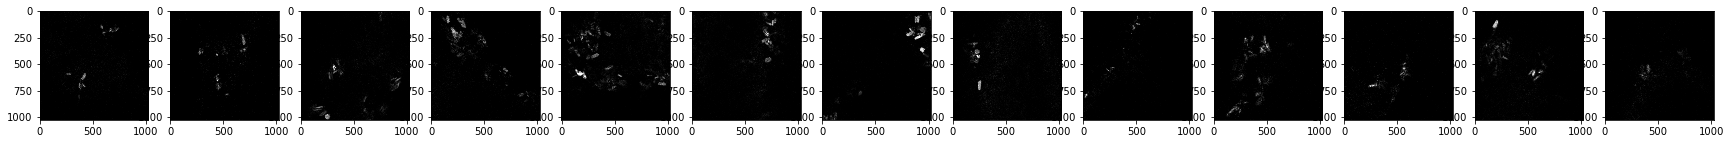

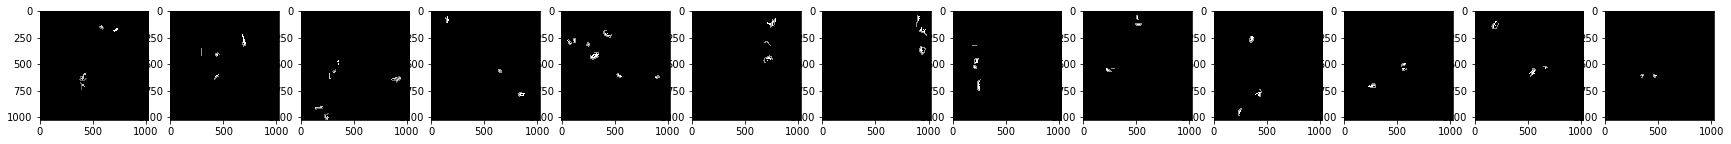

In [5]:
# show all images
fig, axs = plt.subplots(1, 13, figsize=(30,30))
for i, filename in enumerate(file_list):
    image = imread(image_folder + filename)
    cle.imshow(image, plot=axs[i])
plt.show()

# show corresponding label images
fig, axs = plt.subplots(1, 13, figsize=(30,30))
for i, filename in enumerate(file_list):
    masks = imread(masks_folder + filename)
    cle.imshow(masks, plot=axs[i])
plt.show()

## 9.2.3 Training

In [6]:
# setup classifer and where it should be saved
cl_filename = "object_segmenter_20220523_my_data_sorted.cl"
apoc.erase_classifier(cl_filename)
segmenter = apoc.ObjectSegmenter(opencl_filename=cl_filename)

# setup feature set used for training
#features = apoc.PredefinedFeatureSet.object_size_1_to_5_px.value
features = "gaussian_blur=1 difference_of_gaussian=1 laplace_box_of_gaussian_blur=1 sobel_of_gaussian_blur=1"

# train classifier on folders
apoc.train_classifier_from_image_folders(
    segmenter, 
    features, 
    image = image_folder, 
    ground_truth = masks_folder)

## 9.2.4 Prediction

img01_20220429_ET358_56hpf_1.tif


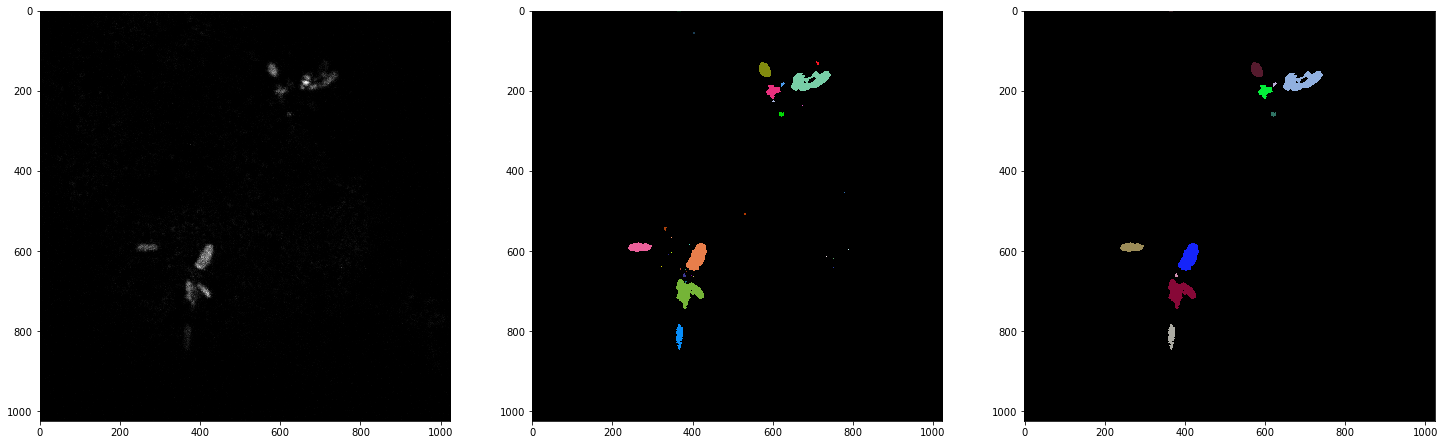

img02_20220429_ET358_56hpf_2.tif


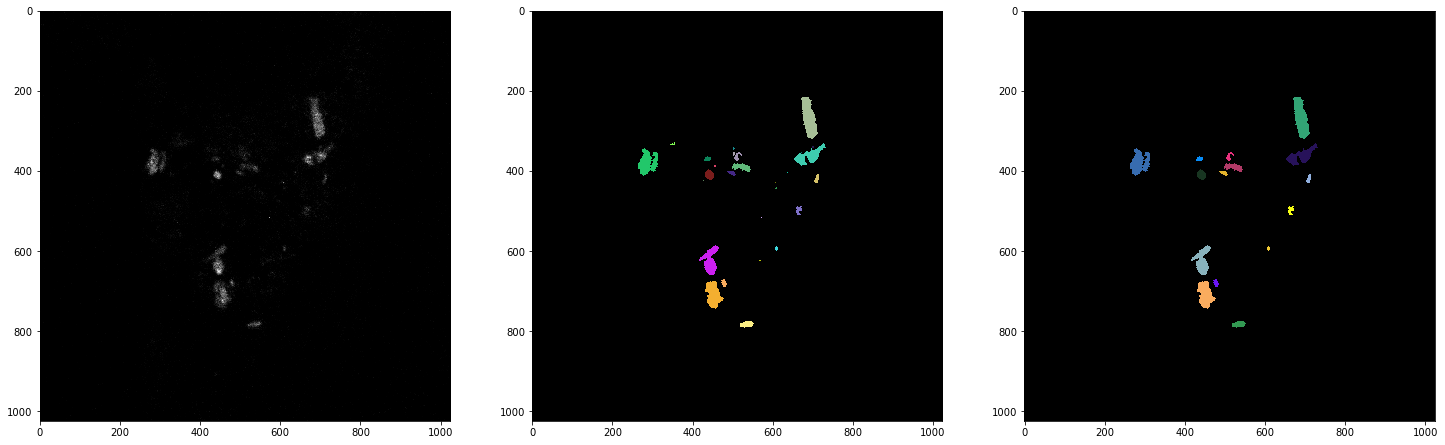

img03_20220429_ET358_56hpf_3.tif


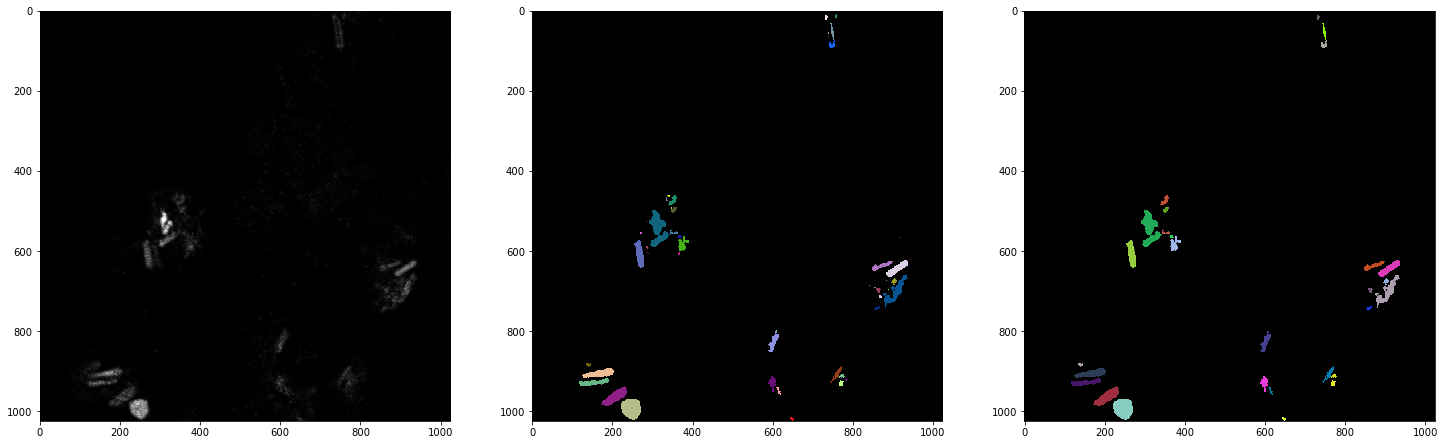

img05_20220513_ET358_56hpf_1.tif


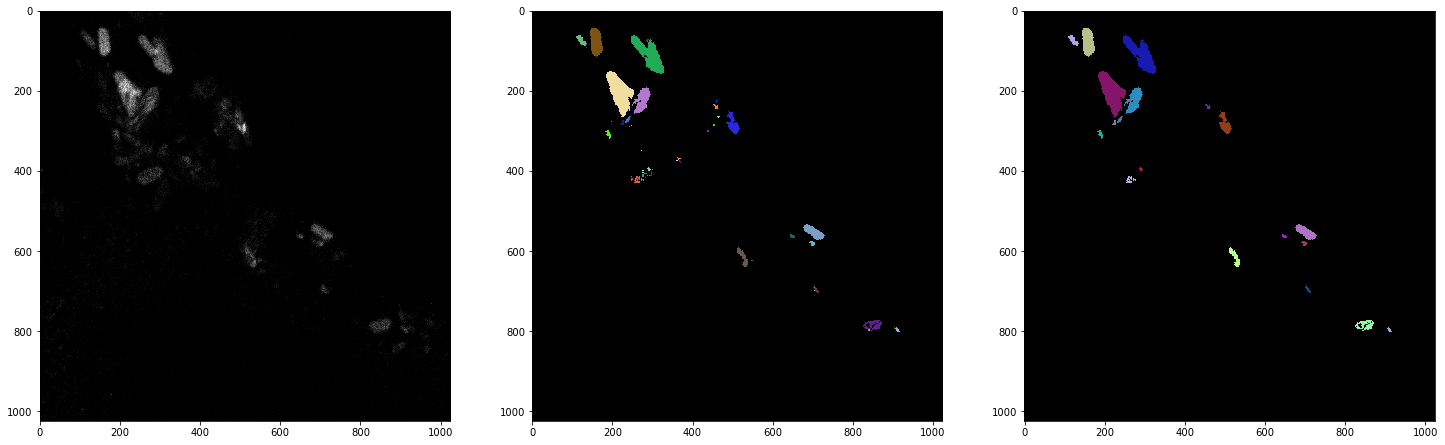

img06_20220513_ET358_56hpf_2.tif


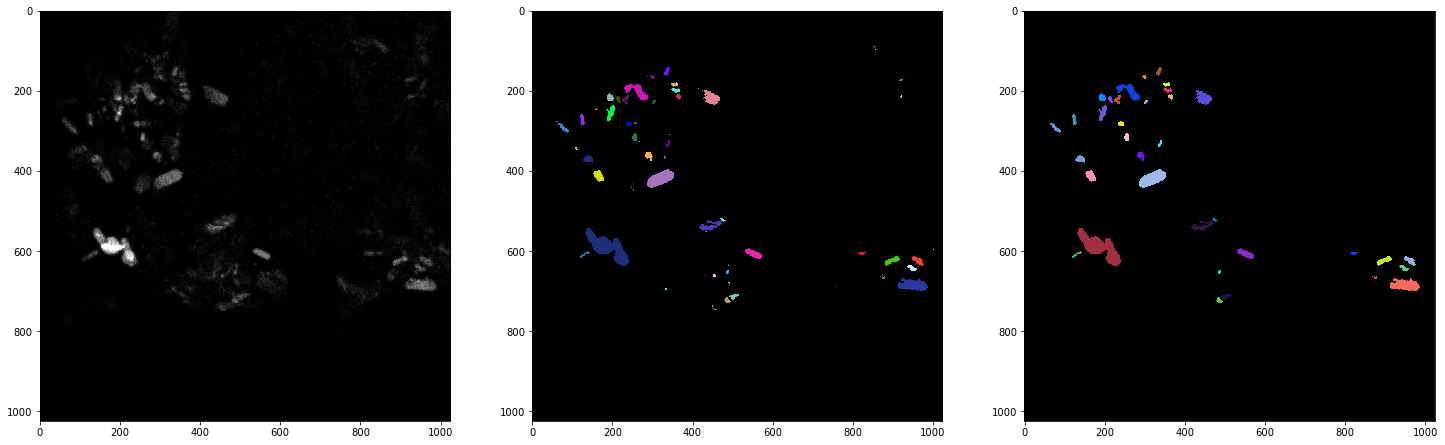

img08_20220513_ET358_56hpf_4.tif


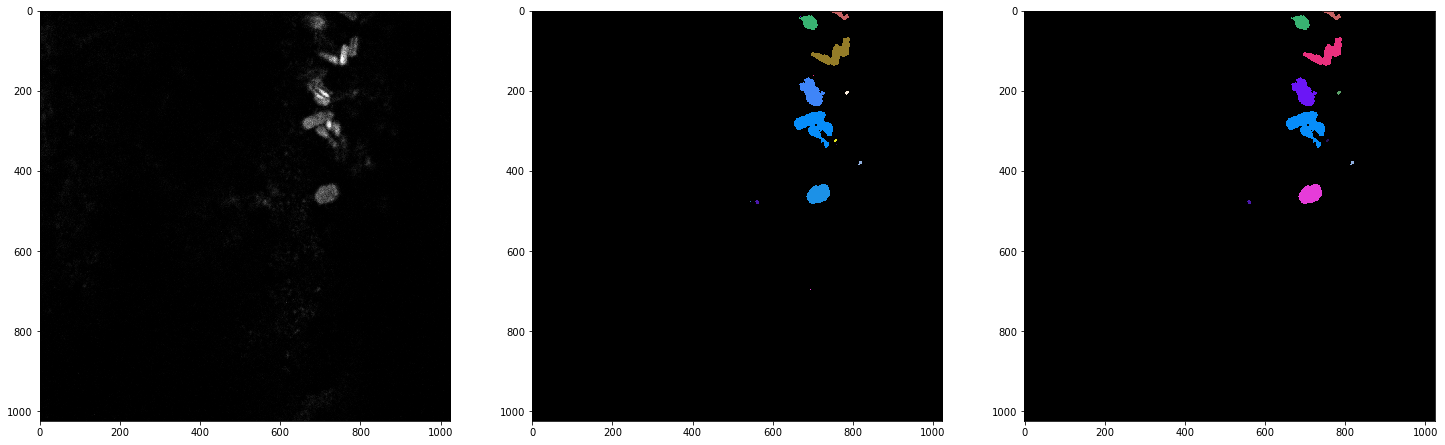

img10_20220513_ET358_56hpf_6.tif


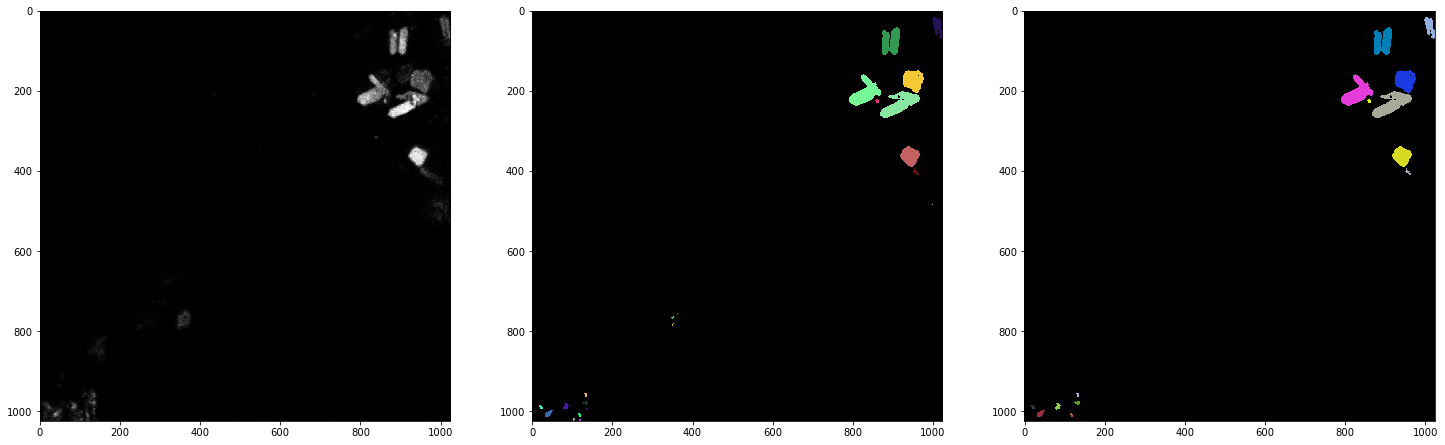

img12_20220513_ET358_56hpf_8.tif


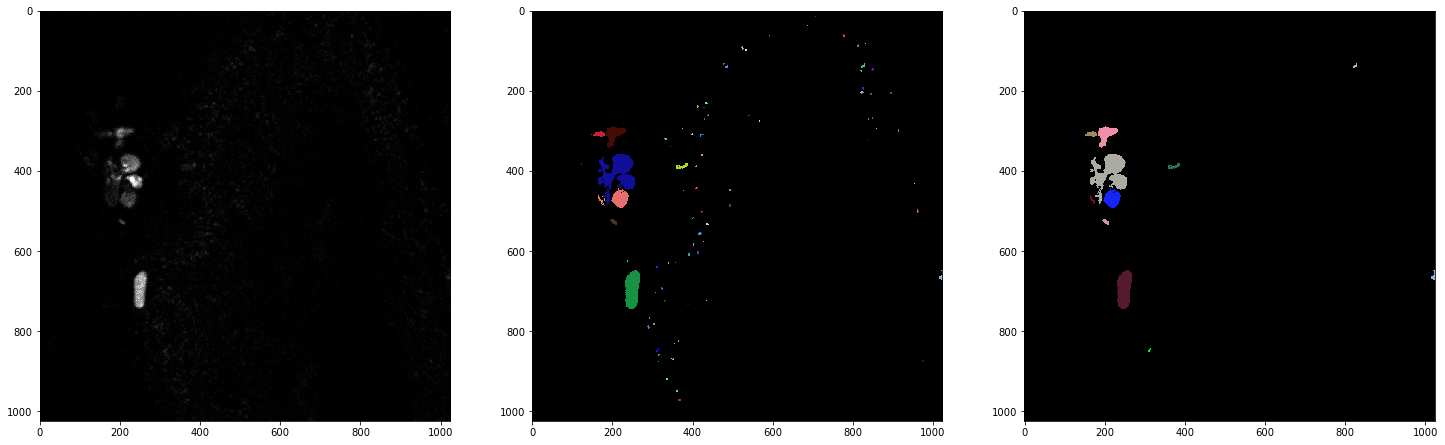

img13_20220513_ET358_56hpf_9.tif


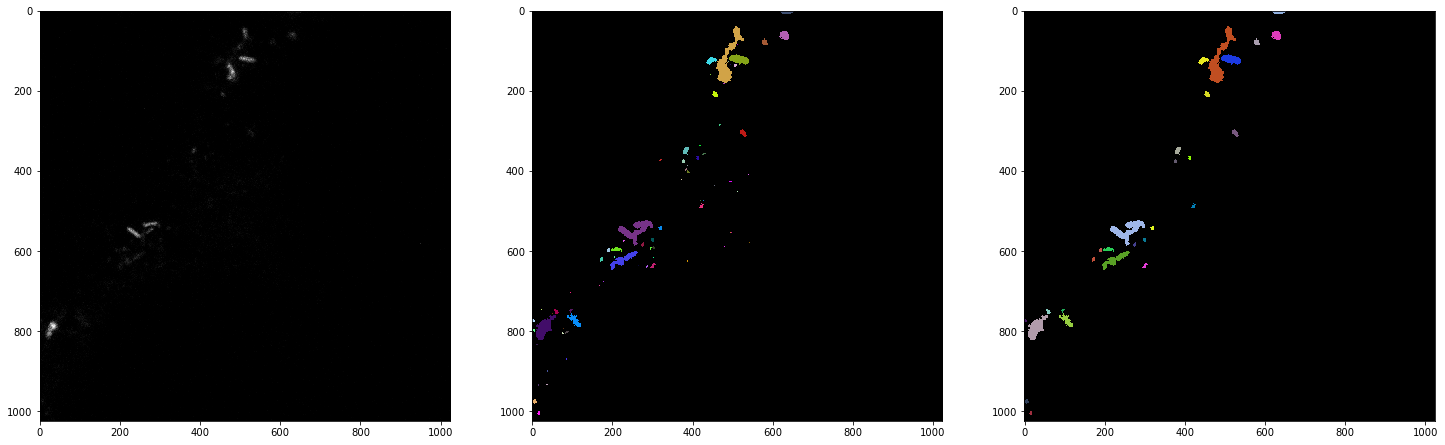

img14_20220520_hsp-mKate-DN-dynactin_56hpf_1.tif


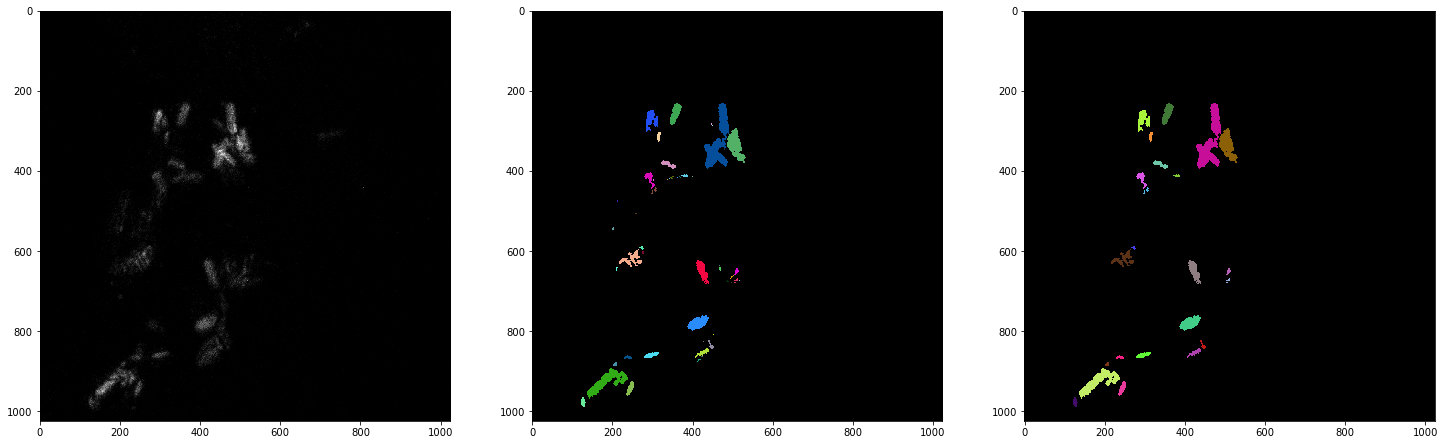

img15_20220520_hsp-mKate-DN-dynactin_56hpf_2.tif


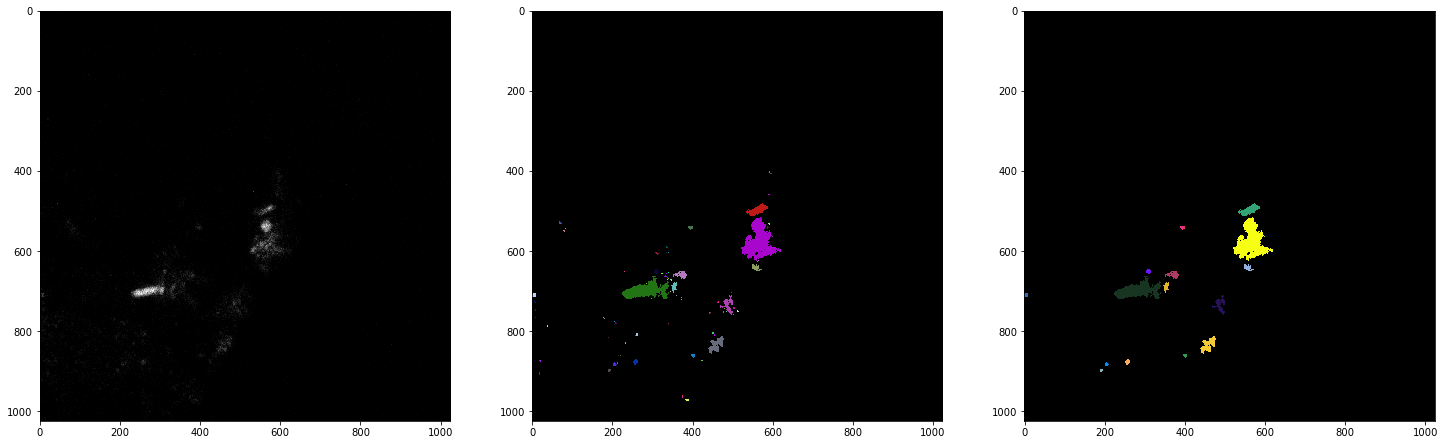

img17_20220520_hsp-mKate-DN-dynactin_56hpf_4.tif


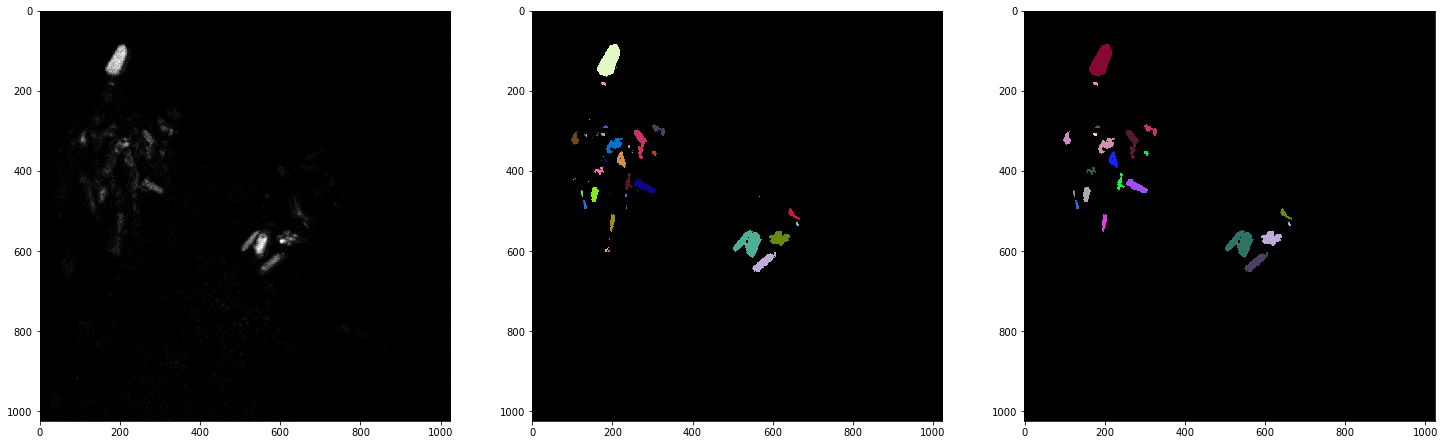

img18_20220520_hsp-mKate-DN-dynactin_56hpf_5.tif


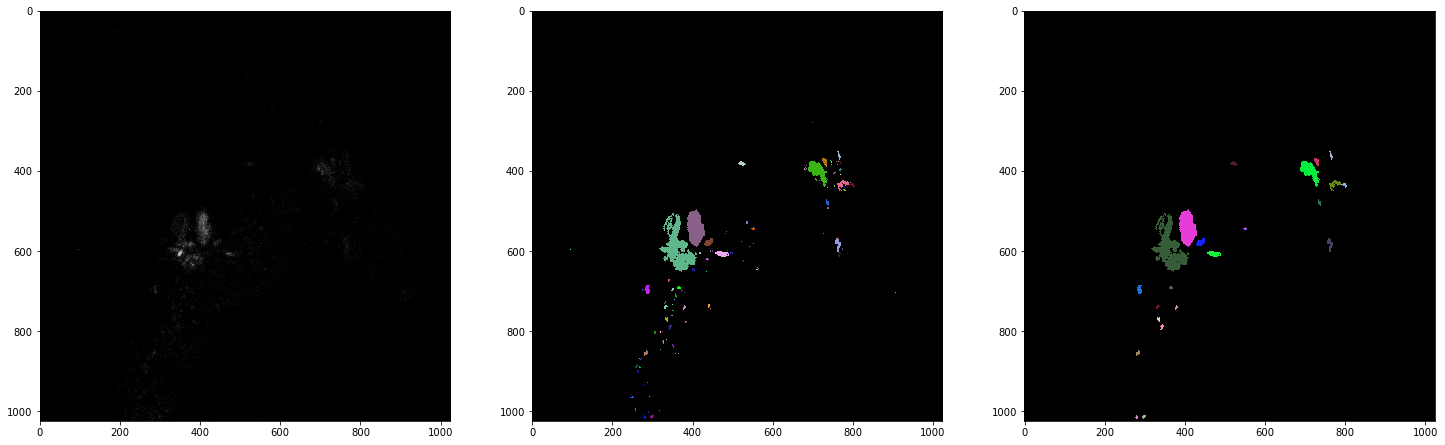

In [7]:
# show all images
for i, filename in enumerate(file_list):
    fig, axs = plt.subplots(1, 3, figsize=(25,25))
    
    #show original
    print(filename)
    image = imread(image_folder + filename)
    cle.imshow(image, plot=axs[0])
    
     #show result of object segmenter
    labels = segmenter.predict(image)
    cle.imshow(labels, plot=axs[1], labels=True)
    
    #show result of object segmenter with labels in range
    labels_in_range = cle.exclude_small_labels(source = labels, maximum_size = 50)
    cle.imshow(labels_in_range, plot=axs[2], labels = True)
    
    #show all images
    plt.show()